# Workshop 7: Data Visualization
In this online workshop you will learn the basic components neccessary for appropriate and effective data visualization. In the in-class workshop, you will put this information to test as you create unique data visualization for relevant biological data.

## Visualization Philosophy

While science is often thought of as simply running experiments and processing results, communicating those results is one of the most important steps. Data visualization is a pivotal step that not only aids in processing results, but also communicating key take aways. However, not all visualizations are created equal, and poor visualizations may obscure or even mislead important findings.

While not exhaustive, here are few guidelines to consider when making visualizations.



## Pick the Correct Plot to Represent Your Data

It is important to pick the plot that best represents the data, and supports conclusions that are

### Plotting Only Summary Statistics May Lead to Incorrect Conclusions

There are many plots you can use to represent similar ideas. Boxplots, violin plots, point plots, and beeswarm plots can all be used to visualize the distribution of values within a feature. However, some methods may better represent the actual distribution of your data, as demonstrated below. The below image shows the potential danger of only plotting summary statistics (boxplots simply plot the 1st, 2nd, and 3rd quartile) while ignoring the raw data.


![alt text](https://blog.bioturing.com/wp-content/uploads/2018/11/BoxViolin.gif)

The above plot was taken from [https://www.autodeskresearch.com/publications/samestats](here), and contains more interesting examples showing the potential downside of plotting only summary statistics. Of course, some of these visualizations are easier to interpret than others, and a simpler plot may be better at communicating the main take away. It is important, however, to ensure that such a plot does accurately show the underlying patterns in your data.

### Overplotting May Obscure Real Patterns

In single-cell biology, it is common to plot each cell in a scatter plot using some reduced dimension (PCA, t-SNE, UMAP, etc.). This not only allows you to visualize potential cell types in your dataset, but also lets you easily visualize how gene expression patterns may change as a function of cells types. One of these plots, is shown below.


![alt text](https://raw.githubusercontent.com/SaskiaFreytag/schex/master/misc/example_schex_files/figure-html/ggplot-decreasing-1.png)

Looking at the above figure, it seems gene expression does not differ from the major clusters in the dataset. However, single-cell datasets are often quite large, and such plots can suffer from overplotting  -- when one datapoint obscures another. Indeed, the below plot is the same dataset plotted in the same dimensions, but cells are plotted in a different order. Because the order changed, the cells with higher expression were plotted atop the cells with lower expression that were previously obscuring them.


![](https://raw.githubusercontent.com/SaskiaFreytag/schex/master/misc/example_schex_files/figure-html/ggplot-increasing-1.png)

To avoid creating  potentially misleading plots, the [schex package](https://github.com/SaskiaFreytag/schex) summarizes neighborhoods of data and plots those summarized areas on a hexgrid. This plot still allows viewers to easily distinguish clusters in the dataset, while also more accurately displaying gene expression patterns. 

![](https://raw.githubusercontent.com/SaskiaFreytag/schex/master/misc/example_schex_files/figure-html/schex-1.png)

### Color Choice May Introduce Artifical Artifacts

The above scatterplots and hexgrids represented gene expression values by plotting different colors along a color map gradient: darker, purple values represented low expression while brigther, yellow values represented high expression. The color map used is known as "viridis", and is a "perceptually uniform color map". This means the color map is a monotonic function in lightness (either only increasing or decreasing, but not changing direction), as demonstrated below. 

![](https://matplotlib.org/_images/lightness_00.png)


Perceptually uniform color maps ensure that an increase in the raw data by $x$, will also lead to a perceived increase in color by $x$. If your chosen color map is *not* perceptually uniform --  such as *jet* and *rainbow* color maps shown below -- you have no such guarantee, and small changes in data more appear larger or more important than the data supports.

![](https://matplotlib.org/_images/lightness_05.png)

Poorly chosen color maps leading to false conclusions can best demonstrated in the below example:

* A matrix dataset is simulated that features sinusoidal oscillations.
* The dataset is plotted using four different color maps: jet, a grayscale representation of jet, viridis, and simple gray scale
* Both jet and grayscale jet appear to show some ellipsoid-type characteristics near the top of plots.
* However, viridis and normal grayscale show these are actually artifacts introduced by the colormaps, instead of representative of the underlying data.

More information on perceptually uniform color maps can be found [here](https://matplotlib.org/users/colormaps.html) and [here](http://colorcet.pyviz.org/).


In [1]:
# taken from: https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable

x = np.linspace(0, 6)
y = np.linspace(0, 3)[:, np.newaxis]
z = 10 * np.cos(x ** 2) * np.exp(-y)


def grayify_cmap(cmap):
    """Return a grayscale version of the colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)
  

cmaps = [plt.cm.jet, grayify_cmap('jet'), plt.cm.viridis, plt.cm.gray]
fig, axes = plt.subplots(2, 2, figsize=(12, 9))


for cmap, ax in zip(cmaps, axes.flatten()):
    im = ax.imshow(z, cmap=cmap)
    ax.set_title(cmap.name)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)

plt.tight_layout()

## Include the Least Amount of Necessary Information

What this means is to include all information necessary to accurately and
quickly interpret a given figure, but to leave out excessive annotations that do
aid readers understanding. Busy plots are hard to parse. It's easy to get lost
in excessive annotations, and information that was meant to aide interpretation
can hinder it. It is hard to set hard and fast rules for what information is
necessary in a plot, and what information is excessive. Take, for example,
the heatmap plotted below.

<a href="https://drive.google.com/uc?export=view&id=1R1Jt6izgZFZA52VNMeOx_j278fXW-WKp"><img src="https://drive.google.com/uc?export=view&id=1R1Jt6izgZFZA52VNMeOx_j278fXW-WKp" style="width: 500px; max-width: 100%; height: auto" title="Click for the larger version." /></a>

By looking at the heatmap we know two things are being clustered, shown by the dendrogram. We know the two things are different entities -- given by different entry labels along the rows and columns. However, we don't know what they represent (e.g. What does GSMXXXXX mean? And how does it relate to MOBP?). Further, we can se there's a difference between the value plotted in some regions of the graph, but we don't know what that value represents. Compare the previous plot with the image below.

<a href="https://drive.google.com/uc?export=view&id=15gbzMdnOmRPbOBY69MScBhMY15T9JV8c"><img src="https://drive.google.com/uc?export=view&id=15gbzMdnOmRPbOBY69MScBhMY15T9JV8c" style="width: 500px; max-width: 100%; height: auto" title="Click for the larger version." /></a>

The data is the same as above, but now we know that columns are repsented by genes and rows are represented by samples: we're looking at a $sample \times gene$ heatmap! Further, the "Z-score" label by the color bar lets us know we're looking at standardized expression values. You might think we're losing information by losing the previous entry labels, but plotted data actually consists of 205 samples and 1000 genes! The previous heatmap definitely didn't include 1000 gene names or even 205 sample names, potentially misleading readers on both the number of genes and samples.

In the above example, we increase clarity by both *removing* information (entry labels along the rows and columns) and *adding* information (labeling rows/columns and labeling the color bar). This is often the type of balance we need to strike when creating clean and clear figures.

# Plotting Libraries

While numerical libraries help us generate results, the results would do little good if we were not able to display them in a digestable manner. Thankfully, due to the recent surge in popularity/demand for data scientists and data science tools, there are now more plotting libraries to choose from in the data science ecosystem than ever before.

## Plotting Tools in Python

There are many plotting libraries to chose from when plotting in Python. Many of them excel in one area or another, so knowing what type of graph you want to create, how you want people to interact with the plot, and what type of environment you will be working in will help you determine which library is best for your needs.

### Matplotlib

*Matplotlib* is the go-to standard for plotting in Python. It's a behometh of a package with excellent user control and options that will cover most, if not all use cases. However, extreme user control comes at the cost of a fair amount of overhead compared to other, high-level plotting libraries such as *Seaborn* or *ggplot2* in R. 

More information can be found [here](https://matplotlib.org/).

**Example**:

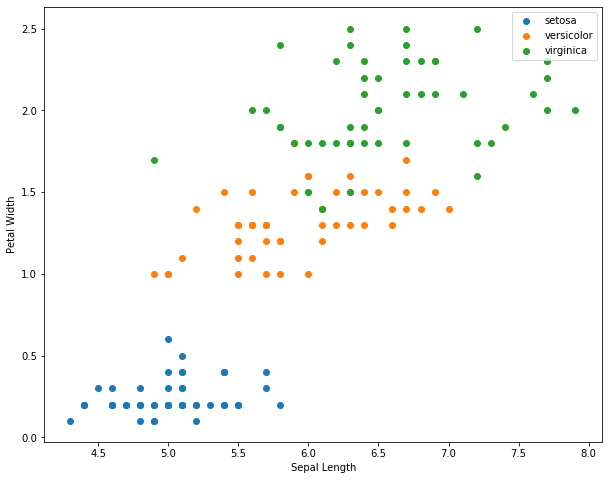

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10.0, 8.0)
iris = sns.load_dataset("iris")
for each in iris['species'].unique():
  subset = iris[iris['species'] == each]
  plt.scatter(x=subset['sepal_length'], y=subset['petal_width'], label=each)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend()

### Seaborn

*Seaborn* is a high-level statistical plotting library that extends *matplotlib*. All plots are still created using *matplotlib*, but the seaborn API makes creating interesting plots much more straight forward. This allows users to generate complex plots relatively easily, while still having access to the more in-depth control *matplotlib* offers.

More information can be found [here](https://seaborn.pydata.org/).

**Example**

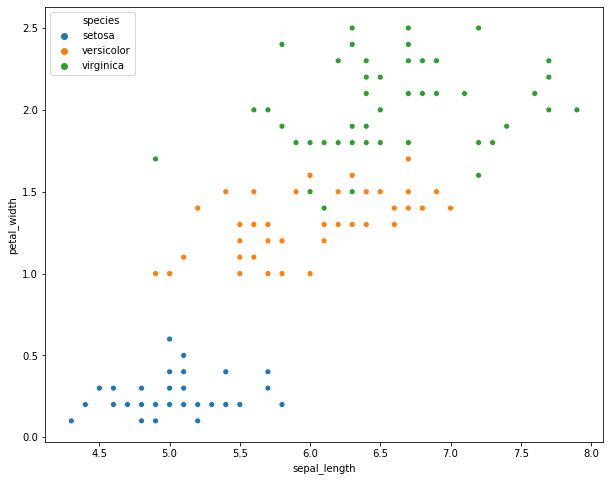

In [3]:
sns.scatterplot(x='sepal_length', y='petal_width', hue='species', data=iris)

### Bokeh

*Bokeh* is a lower-level plotting library that produces interactive plots made for modern web browsers. It is an extremely useful library if you're making visualizations for a website, server-backed apps, or any situation where collaborators or viewers would benefit from an interactive plot.

While *Bokeh* likely has limited use-cases for creating publication figures, it can still be useful during data exploration or when creating a supporting website.

More information can be found [here](https://bokeh.pydata.org/en/latest/).

**Example**

In [28]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook, show
output_notebook()
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
colormap = {'setosa': 'blue', 'versicolor': 'orange', 'virginica': 'green'}
colors = [colormap[x] for x in iris['species']]
p = figure(title='Iris Morphology', tools=TOOLS)
p.xaxis.axis_label = 'Sepal Length'
p.yaxis.axis_label = 'Petal Width'
p.circle(iris['sepal_length'], iris['petal_width'], color=colors, size=10)
show(p)

Loading BokehJS ...

### Altair

*Altair* is a higher-level, declarative statistical plotting library that produces interactive plots with less overhead compared to *bokeh*. However, *Altair* was specifically designed to work in Jupyter Notebooks and similar technologies (Jupyter Lab, Google Collab, etc.). Therefore, if you do not work in such environments, it will likely have limited use. However, if you do work in such environments, it provides a powerful way to easily explore and visualize data.

More information can be found [here](https://altair-viz.github.io/index.html).


**Example**

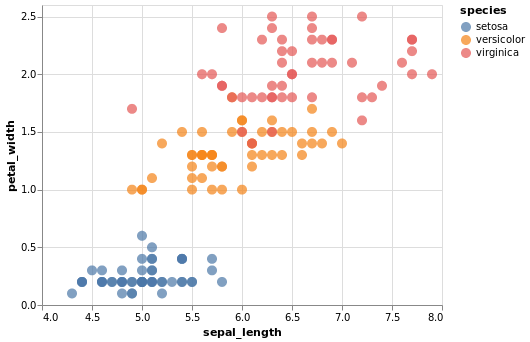

In [5]:
import altair as alt

alt.Chart(iris).mark_circle(size=100).encode(
    alt.X('sepal_length', scale=alt.Scale(zero=False)),
    y='petal_width',
    color='species',
    tooltip=['species', 'sepal_length', 'petal_width']).interactive()

## Plotting Libraries in R

Like Python, R also boasts some very impressive plotting libraries, namely the famous *ggplot2* library. 

### Base R

Unlike Python, R has basic plotting as a part of the standard library. While lacking some the frills of other plotting tools, you can still make clean and readable graphs using basic functionality

**Example**

```
plot(iris$Sepal.Length, iris$Petal.Width, col=iris$Species)
```
<a href="https://drive.google.com/uc?export=view&id=1jirV-R733hEPoQkaUq7YJRDWzk_A0Tam"><img src="https://drive.google.com/uc?export=view&id=1jirV-R733hEPoQkaUq7YJRDWzk_A0Tam" style="width: 500px; max-width: 100%; height: auto" title="Click for the larger version." /></a>


### ggplot2

If there's any package that causes the greatest envy between Python and R users, it is definitely *ggplot2*. *ggplot2* is a declarative plotting library that implements the so-called "grammar of graphics" framework, as expalined in the book  *Grammar of Graphics* by [Leland Wilkinson](https://www.springer.com/in/book/9780387245447?source=post_page---------------------------). It is an extremely user friendly package that makes it easy to produce nice and clean looking graphs, while also providing power-users with the ability to easily modify graphs to their liking.

You can find more information about the package [here](https://ggplot2.tidyverse.org/).


**Example**
```
library(ggplot2)
ggplot(data=iris, aes(x=Sepal.Length, y=Petal.Width, col=Species)) + 
geom_point()
```

<a href="https://drive.google.com/uc?export=view&id=1nqBP038mGguLmK_gGpTIkfEyFWajBTNv"><img src="https://drive.google.com/uc?export=view&id=1nqBP038mGguLmK_gGpTIkfEyFWajBTNv" style="width: 500px; max-width: 100%; height: auto" title="Click for the larger version." /></a>


## Packages for this workshop

The hands-on portion of this workshop will be done in Python, and we will be using the *matplotlib* and *Seaborn* packages. Installation of all required packages can be done by downloading the provided `environment.yaml` file, navigating to the directory where the file is located, and issueing the following command in a terminal window:

```conda create env --name viz --file environment.yaml```

This will install a virtual environment that can be loaded by issuing the following command:

```conda activate viz```

A virtual environment is just an isolated installion of software -- in this case python packages -- that won't interfere with other installations of the same software. In this case we're using a virtual environment known as a `conda` environment, but there are other options out there such as [pipenv](https://docs.pipenv.org/en/latest/).


## Matplotlip Basics

As mentioned above, *matplotlib* is a massive package, and it would be impossible to cover all aspects of the library in a single workshop. For now, we'll just be going over the extreme basic to get started.

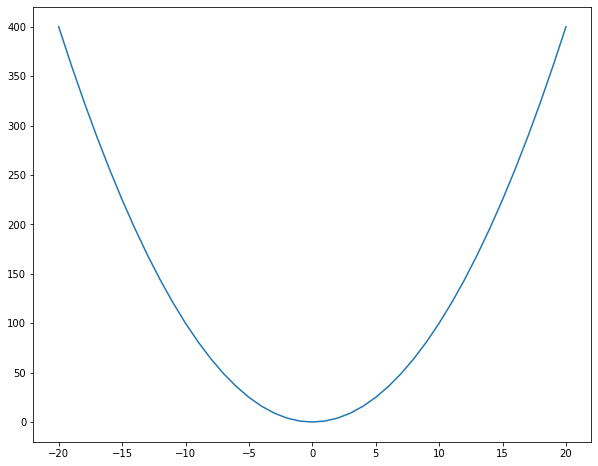

In [6]:
# To interact with matplotlib we first have to import it.
# Generally, instead of importing the entire package, we import the pyplot module
from matplotlib import pyplot as plt  # it is cononical to import pyplot as "plt"
import numpy as np  # also cononical to import numpy as np, numpy is a numerical library

# get values from -20, 20
x = np.arange(-20, 21)
# calculate the square of each value
y = x ** 2
# plot the values as line plot using the "plot" function
plt.plot(x, y)

**Note** If you are working in a non-notebook environment (i.e. a python script or another python interpreter), you'll need to issue the command ```plt.show()``` in order to view the plot window.

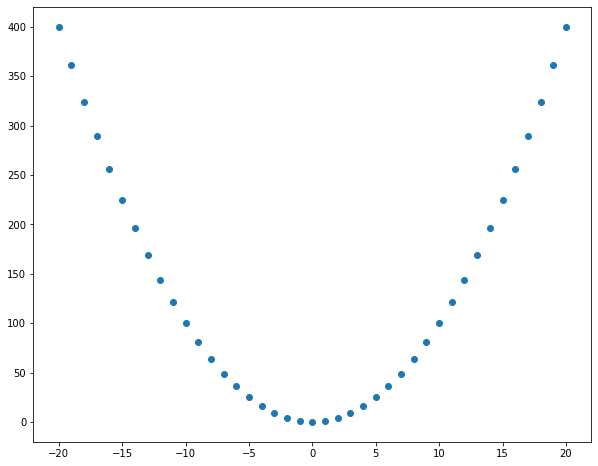

In [7]:
# plot the individual data points using a scatter plot
plt.scatter(x, y)

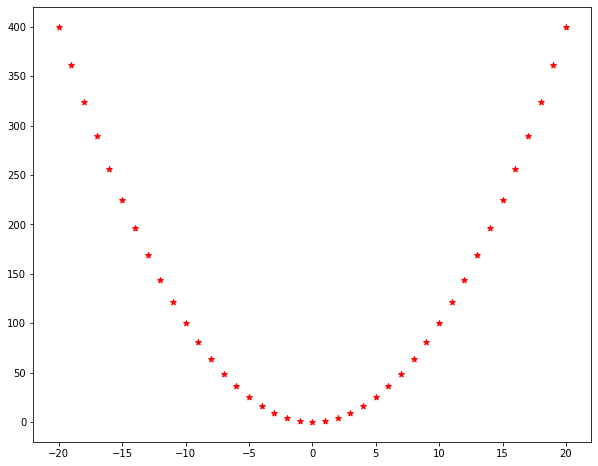

In [8]:
# make the same plot, but with red stars!
plt.scatter(x, y, color='red', marker='*')

```color="red"``` and ```marker="*"``` are called keyword arguments: they are optional styling arguments that are set by passing a key (e.g "color") and a value ("red"). There are a lot of possible keyword arguments you can change, but they are generally consistent across plotting functions. 

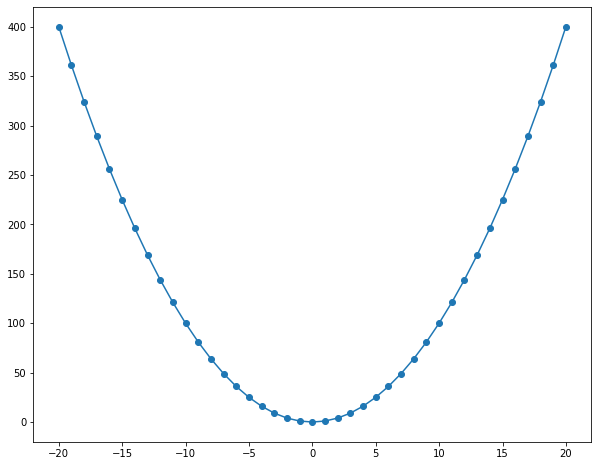

In [9]:
# plot data points as well as the line graph
plt.scatter(x, y)
plt.plot(x, y)

<BarContainer object of 3 artists>

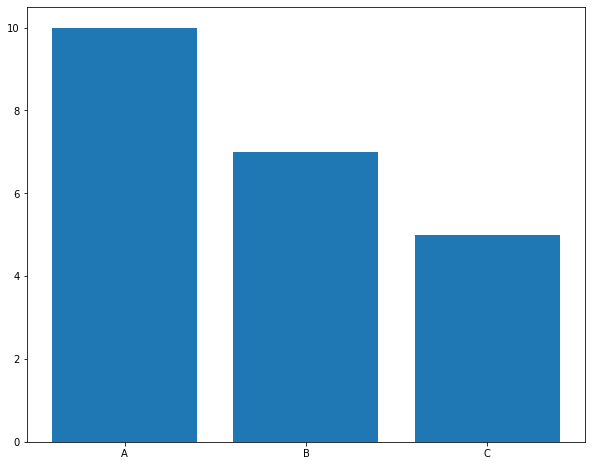

In [10]:
# plot a bar plot of counts 10, 7, and 5 for groups A, B, and C, respectively
plt.bar(['A', 'B', 'C'], [10, 7, 5])

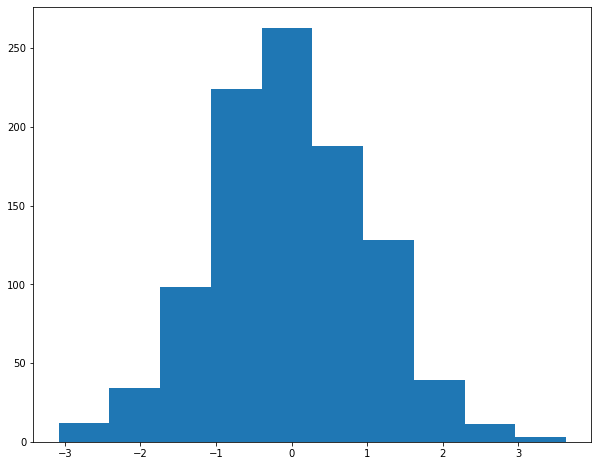

In [11]:
# plot a histogram of sampled values from a standard normal distribution
norm_x = np.random.randn(1000)
__ = plt.hist(norm_x)

Text(0, 0.5, 'Counts')

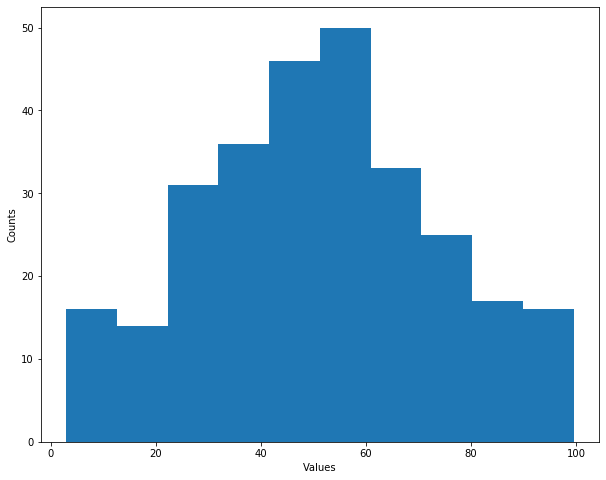

In [12]:
# plot the square of the provided data label
# label axes using plt.xlabel and plt.ylabel functions
data = np.array([55.3846,97.1795,51.5385,96.0256, 46.1538,94.4872,42.8205,91.4103,
40.7692,88.3333,38.7179,84.8718,35.641,79.8718,33.0769,77.5641,
28.9744,74.4872,26.1538,71.4103,23.0769,66.4103,22.3077,61.7949,
22.3077,57.1795,23.3333,52.9487,25.8974,51.0256,29.4872,51.0256,
32.8205,51.0256,35.3846,51.4103,40.2564,51.4103,44.1026,52.9487,
46.6667,54.1026,50,55.2564,53.0769,55.641,56.6667,56.0256,
59.2308,57.9487,61.2821,62.1795,61.5385,66.4103,61.7949,69.1026,
57.4359,55.2564,54.8718,49.8718,52.5641,46.0256,48.2051,38.3333,
49.4872,42.1795,51.0256,44.1026,45.3846,36.4103,42.8205,32.5641,
38.7179,31.4103,35.1282,30.2564,32.5641,32.1795,30,36.7949,
33.5897,41.4103,36.6667,45.641,38.2051,49.1026,29.7436,36.0256,
29.7436,32.1795,30,29.1026,32.0513,26.7949,35.8974,25.2564,
41.0256,25.2564,44.1026,25.641,47.1795,28.718,49.4872,31.4103,
51.5385,34.8718,53.5897,37.5641,55.1282,40.641,56.6667,42.1795,
59.2308,44.4872,62.3077,46.0256,64.8718,46.7949,67.9487,47.9487,
70.5128,53.718,71.5385,60.641,71.5385,64.4872,69.4872,69.4872,
46.9231,79.8718,48.2051,84.1026,50,85.2564,53.0769,85.2564,
55.3846,86.0256,56.6667,86.0256,56.1538,82.9487,53.8462,80.641,
51.2821,78.718,50,78.718,47.9487,77.5641,29.7436,59.8718,
29.7436,62.1795,31.2821,62.5641,57.9487,99.4872,61.7949,99.1026,
64.8718,97.5641,68.4615,94.1026,70.7692,91.0256,72.0513,86.4103,
73.8462,83.3333,75.1282,79.1026,76.6667,75.2564,77.6923,71.4103,
79.7436,66.7949,81.7949,60.2564,83.3333,55.2564,85.1282,51.4103,
86.4103,47.5641,87.9487,46.0256,89.4872,42.5641,93.3333,39.8718,
95.3846,36.7949,98.2051,33.718,56.6667,40.641,59.2308,38.3333,
60.7692,33.718,63.0769,29.1026,64.1026,25.2564,64.359,24.1026,
74.359,22.9487,71.2821,22.9487,67.9487,22.1795,65.8974,20.2564,
63.0769,19.1026,61.2821,19.1026,58.7179,18.3333,55.1282,18.3333,
52.3077,18.3333,49.7436,17.5641,47.4359,16.0256,44.8718,13.718,
48.7179,14.8718,51.2821,14.8718,54.1026,14.8718,56.1538,14.1026,
52.0513,12.5641,48.7179,11.0256,47.1795,9.8718,46.1538,6.0256,
50.5128,9.4872,53.8462,10.2564,57.4359,10.2564,60,10.641,
64.1026,10.641,66.9231,10.641,71.2821,10.641,74.359,10.641,
78.2051,10.641,67.9487,8.718,68.4615,5.2564,68.2051,2.9487,
37.6923,25.7692,39.4872,25.3846,91.2821,41.5385,50,95.7692,
47.9487,95,44.1026,92.6923])
__ = plt.hist(data)
plt.xlabel('Values')
plt.ylabel('Counts')

Text(0.0, 1.0, "Where's Sam Neill When You Really Need Him?")

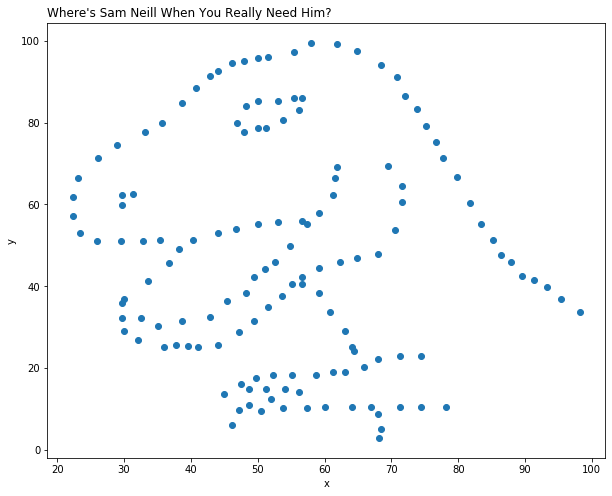

In [13]:
# make the data into a 142 by 2 data matrix
# plot the values as a scatterplot
# label the axes and set a title using the "title" function
hi = data.reshape(142, 2)
plt.scatter(hi[:, 0], hi[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title("Where's Sam Neill When You Really Need Him?", loc="left")

# Data Frames
A data frame is a **two-dimensional** data structure used for storing data tables. It is componsed of lists (or vectors in R) of equal length. Data frames contain a **header** (column names), **row names**, and the actual data stored in **cells**.

Today's workshop will focus on using data frames in python (using the **pandas** library), but this data structure is also commonly used in R. For more information on data frames in R, please reference the following resource: http://www.r-tutor.com/r-introduction/data-frame

#### Creating a Data Frame 
There are numerous ways for creating a data frame using pandas, and they are enumerated here: https://www.geeksforgeeks.org/creating-a-pandas-dataframe/ 
Choose the method that works best for your data. An example of creating a dictionary from a set of lists is below:

In [14]:
### Example Data Frame
# Import Libraries
import pandas as pd

# Create Lists of Data
avengers = ['Iron Man', 'Captain America', 'Thor', 'Black Widow', 'Hawkeye', 'Hulk']
num_appearances = [9, 9, 7, 8, 4, 7]
num_lines = [2788, 924, 856, 463, 148, 472]

# Make Data Frame
dict = {'Avengers': avengers, 'Num_Appearances': num_appearances, 'Num_Lines': num_lines}
marvel_stats = pd.DataFrame(dict) 
print(marvel_stats)

          Avengers  Num_Appearances  Num_Lines
0         Iron Man                9       2788
1  Captain America                9        924
2             Thor                7        856
3      Black Widow                8        463
4          Hawkeye                4        148
5             Hulk                7        472


#### Loading (Reading-In) Data as a Data Frame
More commonly, your data will be stored in an excel or .csv file. In order to work with these data as a data frame, you can read in the data using built-in pandas functions. 

In [15]:
# Read in a csv file
#csv_data = pd.read_csv("csv_example.csv")
# Read in an excel file
#excel_data = pd.read_excel('excel_samples.xlsx')

#### Data Frameifying Data
Oftentimes, your tabular data is not stored in this data frame structure, e.g. is "unstacked" and common attributes are spread across different columns. For these cases it is important to be able to **reshape** your data into the data frame structure. This reshaped data is sometimes called _tidy_ data. 


__TASK:__ Read about _tidy_ data here: [tidy data](https://vita.had.co.nz/papers/tidy-data.pdf) Understanding effective data pre-processing (tidying) is crucial to efficient data visualization!  
 
Some useful functions for reshaping data with pandas:

*   **stack()**
  * Stack method works with the MultiIndex objects in DataFrame, it returning a DataFrame with an index with a new inner-most level of row labels. It changes the wide table to a long table.
*   **unstack()**
  * Unstack is similar to stack method, It also works with multi-index objects in dataframe, producing a reshaped DataFrame with a new inner-most level of column labels.
* **melt()**
  * Melt reshapes the dataframe from wide format to long format. It uses the “id_vars[‘col_names’]” to melt the dataframe by column names.  
 

*Note: In R, it is useful to use the 'tidyverse' packages to reshape data*  





# Types of Plots
## Relational
Relational plots are a type that many people are comfortable using. It displays the relationship between two numerical variables. The intent of these plots is to draw a causal relationship between the two variables.  
**Biological Example:** Expression of one gene over time  
**Types of Plots:** Scatter plot, line plot  
**Seaborn API:**  
  - Seaborn [Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot): Draws a scatter plot  
  - Seaborn [Lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot): Draws a line plot
  - Seaborn [Relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot): Figure-level interface for drawing relational plots onto a **FacetGrid**.  
    - Data must be passed in a long-form DataFrame with variables specified by passing strings to x, y, and other parameters
    - Use the *kind* parameter to specify which underlying plotting fucntion to use (e.g. kind = "scatter")  
    - Can do the same things as the figure-level functions (scatterplot() and lineplot(), but can also facet and do other nice features)
    



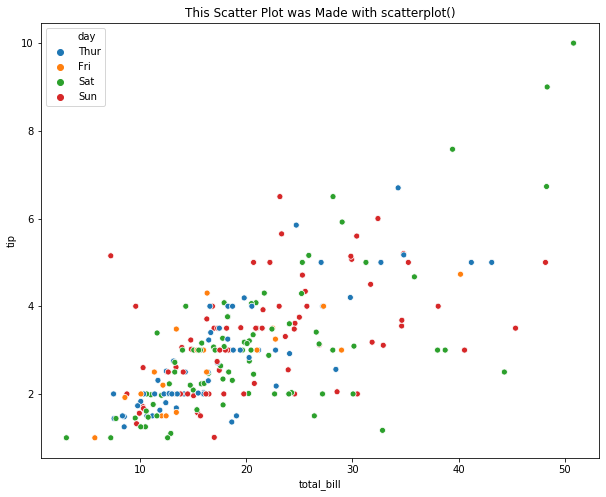

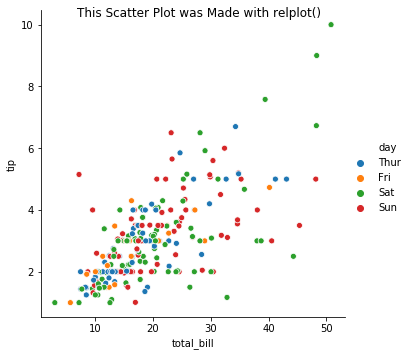

In [16]:
# Load Sample Data
tips = sns.load_dataset("tips")

# Use scatterplot() to generate a scatter plot
plt.title("This Scatter Plot was Made with scatterplot()")
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips)

# Use relplot() to generate a scatter plot
g1 = sns.relplot(x="total_bill", y="tip", hue="day", data=tips, kind='scatter')
g1.fig.suptitle("This Scatter Plot was Made with relplot()");

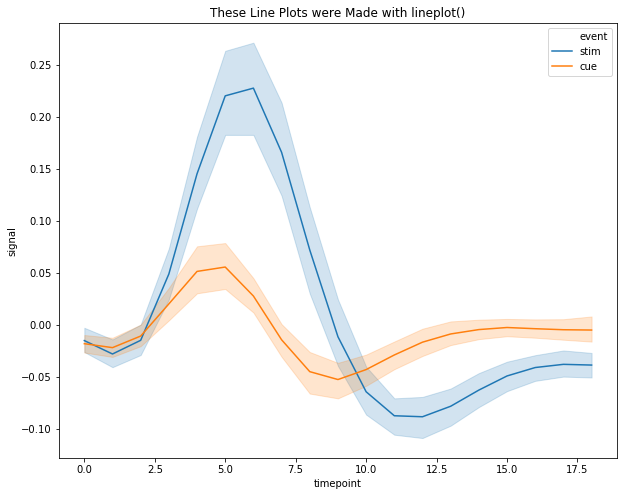

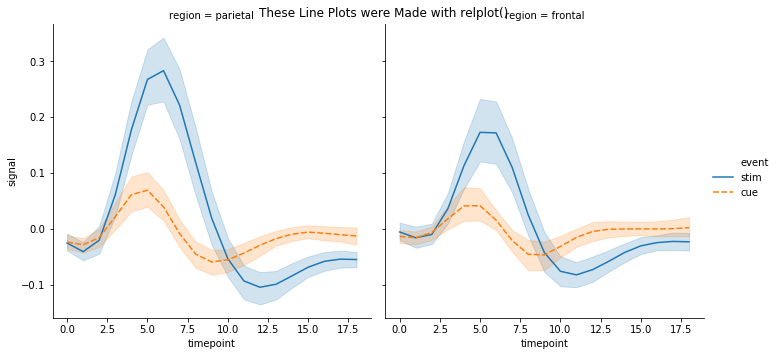

In [17]:
# Load Sample Data
fmri = sns.load_dataset("fmri")

# Use lineplot() to generate a line plot
plt.title("These Line Plots were Made with lineplot()");
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)

# Use relplot() to generate a line plot
g3 = sns.relplot(x="timepoint", y="signal", hue="event", style="event", 
                 col="region", kind="line", data=fmri)
g3.fig.suptitle("These Line Plots were Made with relplot()");

## Categorical
Categorical plots show the relationship between one numerical variable and one or more categorical variables.  
**Types of Plots:** 
*   Categorical Scatter Plots
*   Categorical Distribution Plots
* Categorical Estimate Plots
  
**Seaborn API:**  
  * Categorical Scatter Plots
    * [Strip plot](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot)
    * [Swarm plot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot)
  * Categorical Distribution Plots
    * [Box plot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)
    * [Violin plot ](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) 
  * Categorical Estimate Plots
    * [Point plot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot)
    * [Bar plot](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot)
    * [Count plot  ](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)
  * Seaborn [Catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot): Figure-level interface for drawing categorical plots onto a **FacetGrid**. 
    * Data must be passed in a long-form DataFrame with variables specified by passing strings to x, y, and other parameters
    * Use the *kind* parameter to specify which underlying plotting fucntion to use (e.g. kind = "scatter")  
    * Can do the same things as the figure-level functions, but can also facet and do other nice features
  
**Excercise**: Look at the different representations of the data below. Which plot(s) are best suited for showing the relationship between amount of excercise and pulse? Are there any plots that are misleading or innaporpriate?

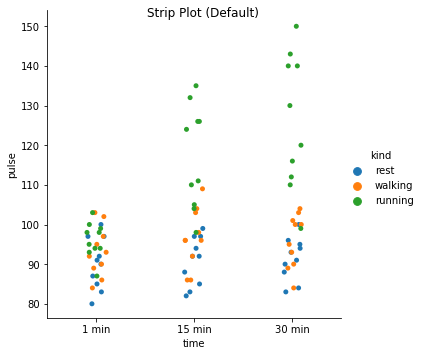

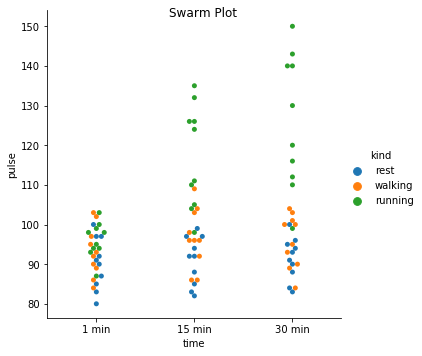

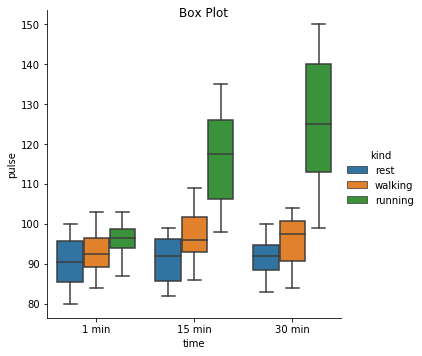

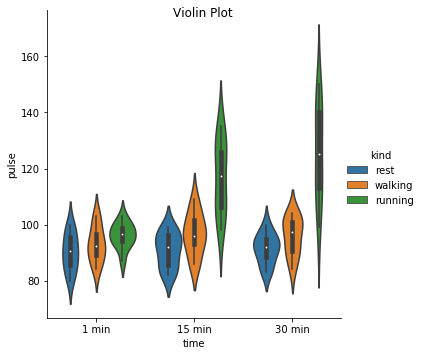

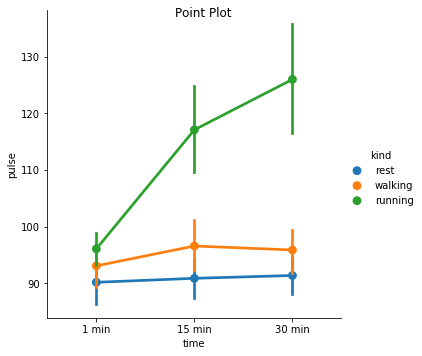

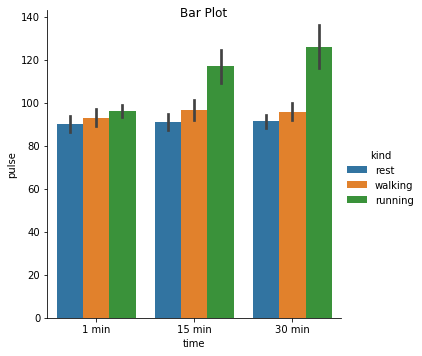

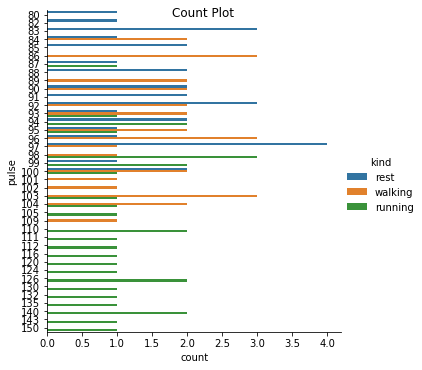

In [18]:
# Load Sample Data
exercise = sns.load_dataset("exercise")
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise, kind="strip")
g. fig.suptitle("Strip Plot (Default)");
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise, kind="swarm")
g. fig.suptitle("Swarm Plot");
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise, kind="box")
g. fig.suptitle("Box Plot");
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise, kind="violin")
g. fig.suptitle("Violin Plot")
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise, kind="point")
g. fig.suptitle("Point Plot");
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise, kind="bar")
g. fig.suptitle("Bar Plot");
g = sns.catplot(y="pulse", hue="kind", data=exercise, kind="count")
g. fig.suptitle("Count Plot");


## Matrix Plots

Matrix plots -- often referred ot as "heatmaps" -- take an  $N \times M$ data matrix and plot each cell value as a specified color. The color of each cell is determine by the value in the cell, and where the value falls along the specific color map -- note: a color map is a mapping from a value range (e.g. $[0, 1]$) to specified colors representing these values (e.g. the closer to zero a number is the more blue it will appear, and the closer to 1 the value is the more red the color will be). In this way, matrix plots allow the visualization of multidimensional data fairly easily. In Bioinformatics, these plots are often used to display gene expression pattens for a large number of genes across a large number of samples.

**Example**
Using the `heatmap` function in seaborn, plot the number of flight passengers for each month through the years 1949 - 1960.

Upon loading, the `flights` dataset is 'long' formatted.

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121



By 'pivoting' the dataset, we get a data matrix of (months x years) and will be able to plot the data as a heatmap.

year      1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                        
January    112   115   145   171   196   204   242   284   315   340   360   
February   118   126   150   180   196   188   233   277   301   318   342   
March      132   141   178   193   236   235   267   317   356   362   406   
April      129   135   163   181   235   227   269   313   348   348   396   
May        121   125   172   183   229   234   270   318   355   363   420   

year      1960  
month           
January    417  
February   391  
March      419  
April     

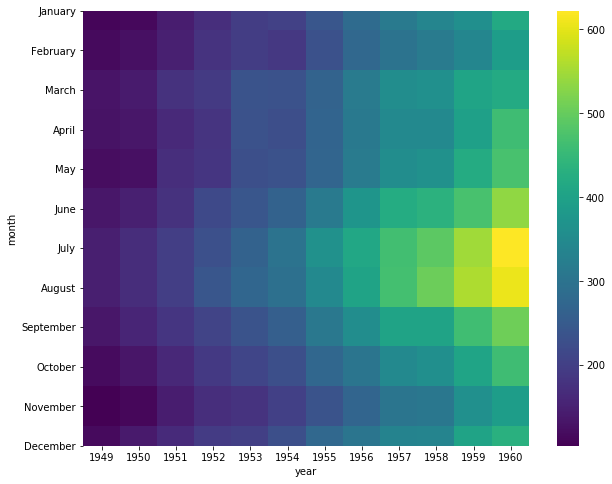

In [19]:
# Load in the dataset
flights = sns.load_dataset("flights")
print("Upon loading, the `flights` dataset is 'long' formatted.\n")
print(flights.head())
print('\n\n')
print("By 'pivoting' the dataset, we get a data matrix of (months x years)" +
      " and will be able to plot the data as a heatmap.\n")
flights = flights.pivot("month", "year", "passengers")
print(flights.head())
ax = sns.heatmap(flights, cmap="viridis")

To better visualize patterns in the data, it is often useful to cluster rows and columns of a data matrix *before* plotting the data matrix as a heatmap. In seaborn, this is done with the `clustermap()` function.

**Example**
To visualize pattens between the number of passengers throughout years and months, plot a clustered heatmap.

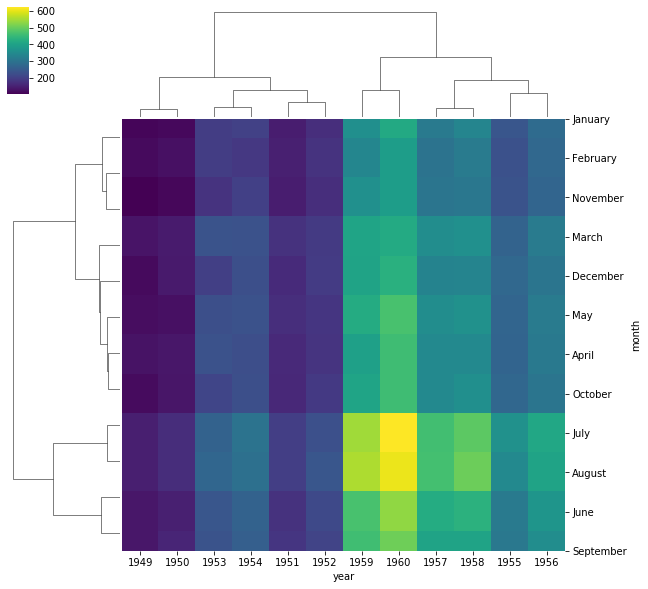

In [20]:
sns.clustermap(flights, cmap='viridis')

When looking at a heatmap -- even when clustered -- it can be difficult to adequately visualize distinct clusters. Heatmaps, and clustered heatmaps, can also be used on distance matrices to visualize distances between samples or features to better visualize simmilarity between categories of interest.

**Example**
Plot a clustered heatmap showing the distance between the number of passengers for each month throughout the years.

/home/dakota/miniconda3/envs/viz/lib/python3.7/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


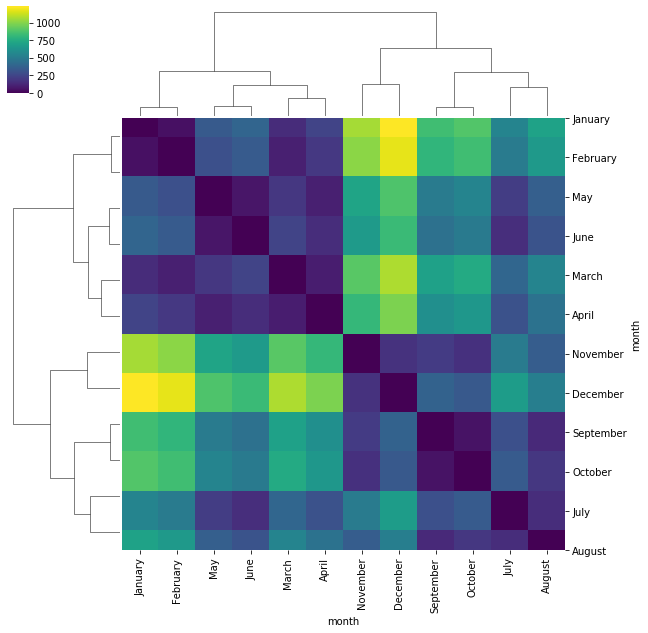

In [21]:
from scipy import spatial
import pandas as pd
# calculate pairwise euclidean distances using scipy
dist_matrix = spatial.distance.squareform(spatial.distance.pdist(flights.T))
dist_df = pd.DataFrame(dist_matrix, columns=flights.index, index=flights.index)
sns.clustermap(dist_df, cmap='viridis')


## Distribution Plots

The basis for all parametric statistical analysis are the underlying distributions of the sample data. Therefore, it is often informative to plot the distribution of features of interest. This can either be done using a histogram, modelling the underlying distribution, or even plotting a histogram against an assumed distribution for comparison. In either case, *Seaborn* makes this easy using the `distplot` function.

**Example**

Plot the distribution of sepal lengths in the iris dataset as a histogram.

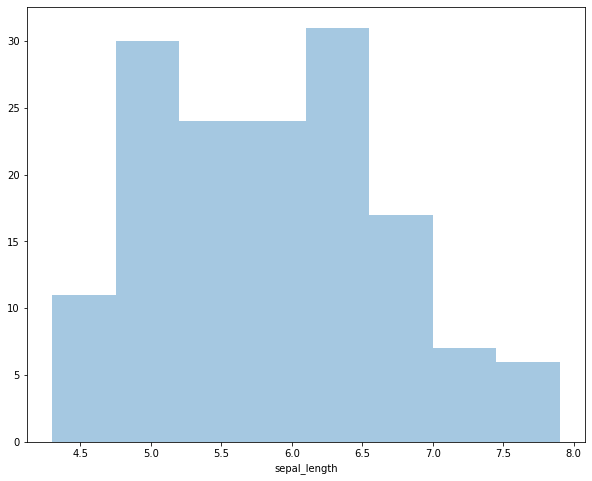

In [22]:
sns.distplot(iris['sepal_length'], kde=False)

If we prefer to use *matplotlib* directly, instead of using *Seaborn* we can simply use the ```hist``` function.

**Example** Plot a histogram of petal width for each species in the iris dataset. Plot them on the same graph.

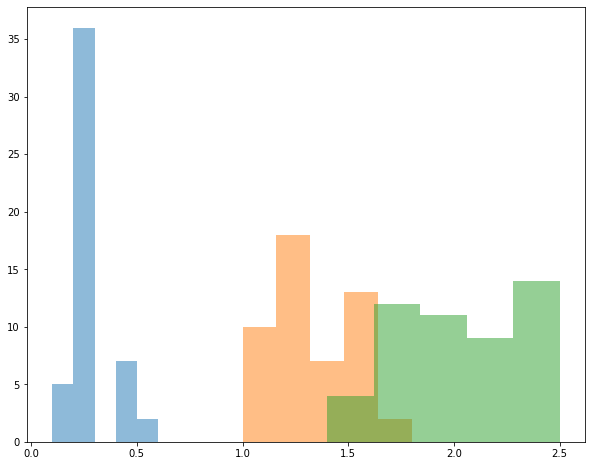

In [23]:
for each in iris['species'].unique():
  subset = iris[iris['species'] == each]
  plt.hist(subset['petal_width'], bins=5, label=each, alpha=0.5)

Sometimees we might prefer to plot the estimated distribution with a probability distribution instead of using a histogram. In *Seaborn*, this can be done by setting the parameter `kde=True` in the `distplot` function.

**Example** Plot the estimated distrubtion of petal width for each species in the iris dataset. Note: while many *Seaborn* functions allow you to pass a vector/Series/array of labels that will automatically segegrate samples, this is not true for `distplot`, and we must do it ourselves.

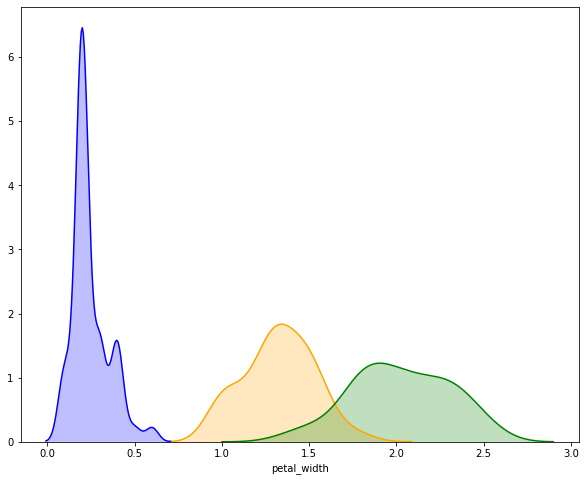

In [24]:
# create an axes object to plot on
ax = plt.subplot()
colormap = {x:c for x, c in zip(iris['species'].unique(), ['blue', 'orange', 'green'])}
# subset the dataset to each species, plot on the shared axes object.
for each in iris['species'].unique():
  subset = iris[iris['species'] == each]
  sns.distplot(subset['petal_width'], hist=False, kde=True, color=colormap[each], ax=ax,
               kde_kws={'shade': True})

While plotting univariate distriubtions is nice, we can also plot joint distributions between two random variables. These plots are useful if we want to see the relationship between two features. To do so using *Seaborn*, we simply use the `kdeplot` function.

**Example** Plot the joint distrubtion of petal width and sepal length for all samples in the iris dataset.

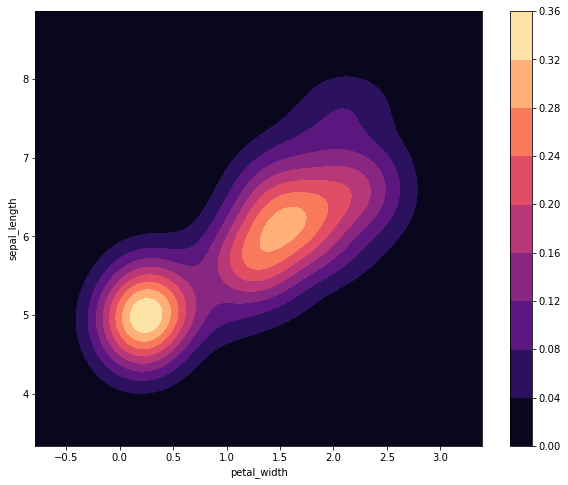

In [25]:
sns.kdeplot(iris['petal_width'], iris['sepal_length'], shade=True, cmap='magma', cbar=True)

Unlike previous plots, we can not easily plot the species-dependent distributions all on the same graph. Well, we could if we wanted to, but it could get a little messy.

**Example** Plot a joint distriubtion of sepal length and petal width all on the same graph. Plot each species as a different color.

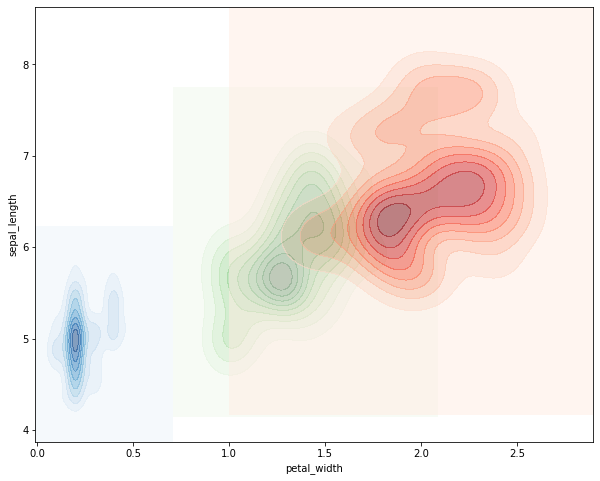

In [26]:
# create an axes object to plot on
ax = plt.subplot()
# subset the dataset to each species, plot on the shared axes object.
colormaps = ['Blues', 'Greens', 'Reds']
for i, each in enumerate(iris['species'].unique()):
  subset = iris[iris['species'] == each]
  sns.kdeplot(subset['petal_width'], subset['sepal_length'], ax=ax,
              shade=True, cmap=colormaps[i], alpha=0.5)

That's defnitely pretty gross. It would probably be better to plot each distribution on its own graph and show the three distributions side-by-side. To do that, we'll need to use the `subplots` command from matplob lib.

**Example** Plot the joint distribution of petal width and sepal length for each species on a different graph. Display the plots side-by-side on the same figure.

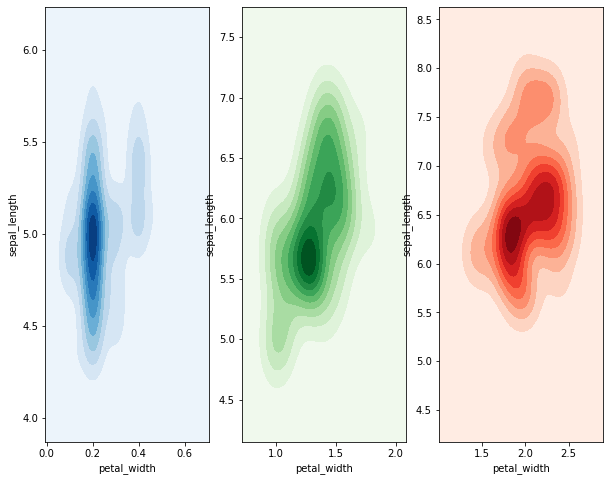

In [27]:
# create an axes object to plot on
fig, axes = plt.subplots(nrows=1, ncols=3)
# subset the dataset to each species, plot on the shared axes object.
colormaps = ['Blues', 'Greens', 'Reds']
for i, each in enumerate(iris['species'].unique()):
  subset = iris[iris['species'] == each]
  sns.kdeplot(subset['petal_width'], subset['sepal_length'], ax=axes[i],
              shade=True, cmap=colormaps[i])

## Seaborn Cheat Sheet
[Seaborn Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)
